In [4]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test  = x_test.reshape((10000, 32, 32, 3))

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, 3, padding='same', 
                              activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, 3, padding='same', 
                              activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), 
                    epochs=200, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Epoch 105/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2429 - accuracy: 0.5624 - val_loss: 1.2726 - val_accuracy: 0.5482
Epoch 106/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2386 - accuracy: 0.5678 - val_loss: 1.2656 - val_accuracy: 0.5605
Epoch 107/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2372 - accuracy: 0.5678 - val_loss: 1.2731 - val_accuracy: 0.5510
Epoch 108/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2354 - accuracy: 0.5689 - val_loss: 1.2637 - val_accuracy: 0.5549
Epoch 109/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2308 - accuracy: 0.5697 - val_loss: 1.2568 - val_accuracy: 0.5518
Epoch 110/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2290 - accuracy: 0.5712 - val_loss: 1.2564 - val_accuracy: 0.5548
Epoch 111/200
196/196 [==============================] - 2s 8ms/step - loss: 1.2288 - accuracy: 0.5709 - val_loss: 1.2650 - val_ac

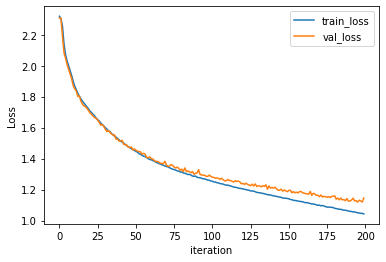

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

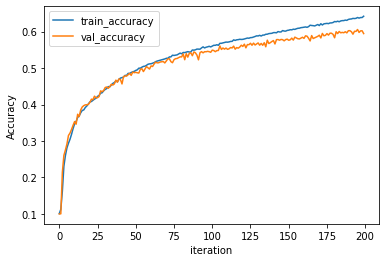

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()